# TP Decision Tree : Regression   +Train-Test-Validation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
#%matplotlib inline  
plt.ion()
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

### Regression

In [2]:
np.random.seed(42) # Set the random seed

def groundTruth(x):
    return np.tanh(x)

# Create a noisy tanh dataset
def regression_data(Ntrain, noiseType='every5', noiseStrength=1.0):
    ## the X locations where data is available are taken at random, uniformly
    X = np.sort(6 * np.random.rand(Ntrain) - 3, axis=0) ## Ntrain lines, 1 column // amplitude 6, average 0
    
    ## the data  to predict is y=tanh(X)+noise
    y = np.tanh(X)
    if noiseType == 'every5':
        ## noise "some observations are very noisy, some are perfect"
        y[::5] += noiseStrength * (0.5 - np.random.rand(Ntrain//5)) # add noise once every 5 entry
    elif noiseType == 'everywhere':
        ## more intersting noise: all observations have a bit of noise ##
        y += noiseStrength * (0.5 - np.random.rand(Ntrain)) ## uniform distrib of width  [noiseType]
    
    X_test_GroundTruth = np.arange(-3.0, 3.0, 0.05)[:, np.newaxis]
    y_test_GroundTruth = groundTruth(X_test_GroundTruth) # np.tanh(X_test_GroundTruth).ravel()
    return X,y,X_test_GroundTruth,y_test_GroundTruth


In [3]:
noiseType='every5'
noiseType='everywhere'
noiseStrength=1.0

Ntrain = 400
X,y, X_test_GroundTruth,y_test_GroundTruth = regression_data(Ntrain, noiseType, noiseStrength)
Ntest = 200
Xtest,ytest, trash,trash = regression_data(Ntest, noiseType, noiseStrength)
Nvalidation = 200
Xvali,yvali, trash, trash = regression_data(Nvalidation, noiseType, noiseStrength)

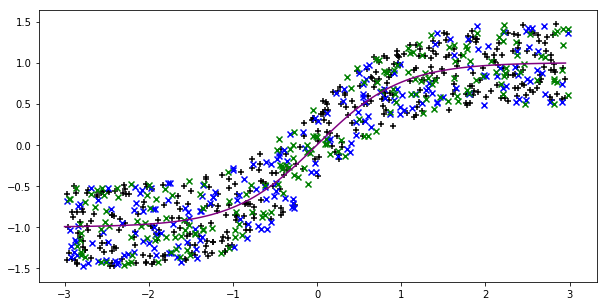

In [4]:
plt.figure(1,[10,5])
plt.scatter(X, y, marker='+', c="black")
plt.scatter(Xtest, ytest, marker='x', c="blue")
plt.scatter(Xvali, yvali, marker='x', c="green")
# plt.show()
# plt.figure(1,[10,5])
plt.plot(X_test_GroundTruth, y_test_GroundTruth, ls='-', c="purple")

#### Regression error: 

In [5]:
## we can define various error functions
def error_regression_MSE(y_pred, y_true):
    return np.linalg.norm(y_pred - y_true) / len(y_pred)

def error_regression_MAE(y_pred, y_true):
    return np.mean(np.absolute(y_pred - y_true))

In [6]:
print(error_regression_MSE(groundTruth(Xtest), ytest))
print(error_regression_MAE(groundTruth(Xtest), ytest))
## in what follows we use MAE, but you can do as you wish ! ##

0.021617273664727335
0.27188860325833675


### Decision Tree
http://scikit-learn.org/stable/modules/tree.html
- Train a DecisionTreeRegressor on the data set. ( http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html# )
- evaluate the training error
- evaluate the test error
- what happenned ? what went wrong ?

In [7]:
from sklearn import tree

In [8]:
## we start by not specifying  max_depth  , which makes it uncontrolled, and in practice, unlimited ##
clf = tree.DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1) 
# generates a classifier based on a decision tree

In [9]:
#we use  X.reshape(X.size,1)  instead of X , otherwise the method complains that it wants a 2D array
Xreshaped = X.reshape(X.size,1)
clf.fit(Xreshaped, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
error_train = error_regression_MAE(y, clf.predict(Xreshaped))
print('training error = ', error_train)

training error =  2.1243161691880674e-06


**Note: the train set error on its own data is essentially 0**

**We massively over-fitted**

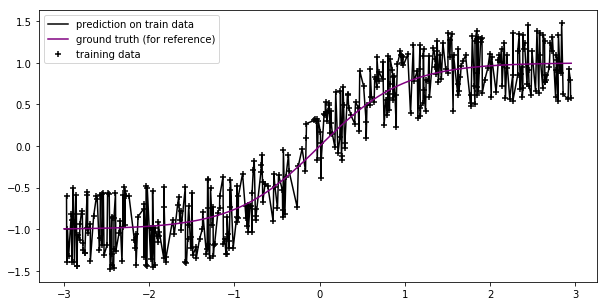

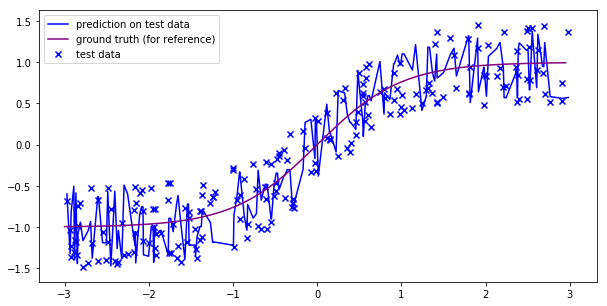

In [11]:
plt.figure(1,[10,5])
plt.scatter(X, y, marker='+', c="black" , label='training data')
plt.plot(X, clf.predict(Xreshaped), c="black", label='prediction on train data')
plt.plot(X_test_GroundTruth, y_test_GroundTruth, ls='-', c="purple", label="ground truth (for reference)")
plt.legend()
plt.figure(2,[10,5])
plt.plot(Xtest, clf.predict(Xtest.reshape(Xtest.size,1)), c="blue", label='prediction on test data')
plt.scatter(Xtest, ytest, marker='x', c="blue", label="test data")
plt.plot(X_test_GroundTruth, y_test_GroundTruth, ls='-', c="purple", label="ground truth (for reference)")
plt.legend()

In [12]:
test_error = error_regression_MAE(ytest, clf.predict(Xtest.reshape(Xtest.size,1)))
print('test error =', test_error)

test error = 0.3411033659069389


In [13]:
## a silly test, because in reality we never have access to the "ground truth"
train_vs_groundTruth = error_regression_MAE(groundTruth(Xreshaped), clf.predict(Xreshaped))
print('error between training-set-prediction and ground truth = ', error_train)

error between training-set-prediction and ground truth =  2.1243161691880674e-06


**We note that the training-set prediction fits every single training data, but not the true curve (tanh), nor the test set (blue points). The test set was drawn from the same probability distribution as the training set, but is a different *realization* of this random process**


### Solve the problem:
- In a loop, vary the hyper-parameter 'max_depth' and display predictions. (Ideally, the whole data presented in a separate figure, each time)
- On a single figure, plot the train error and the test error (as function of max_depth)

### Step 2
- Find the best value for 'max_depth' 

###  Step 3
- Measure the true performance of this model

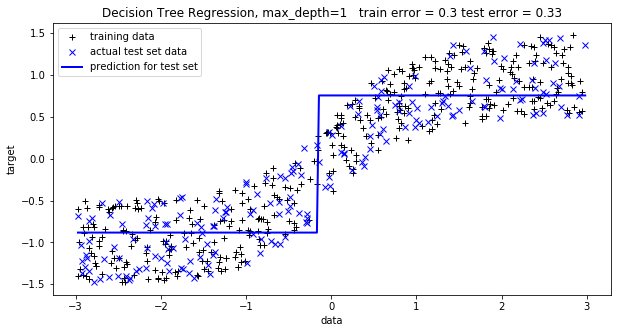

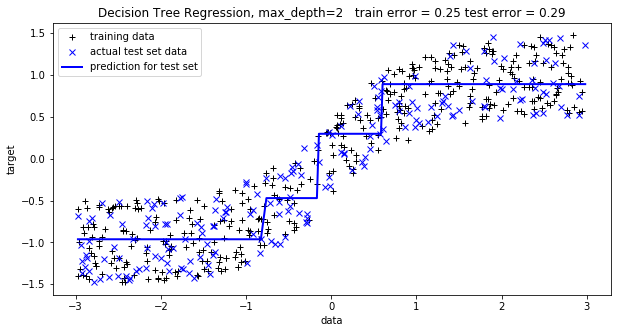

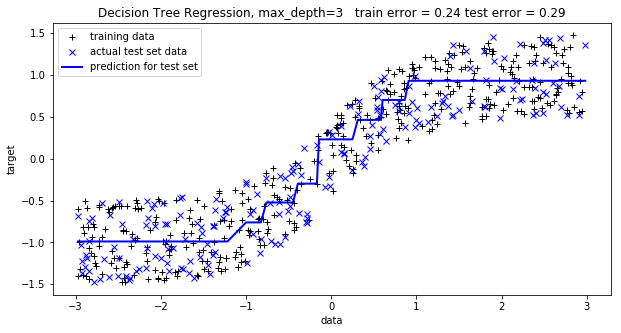

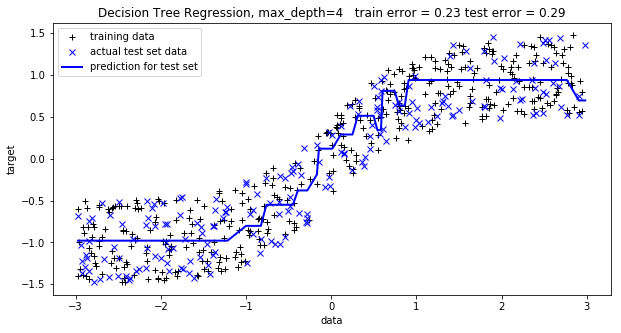

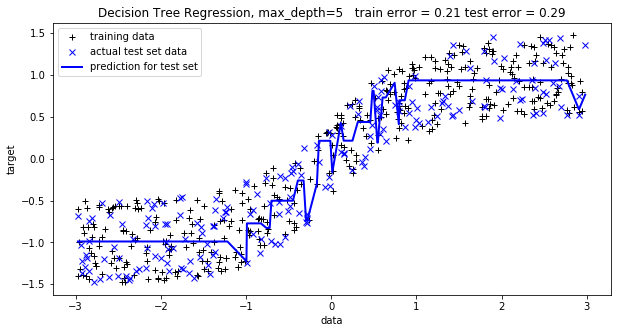

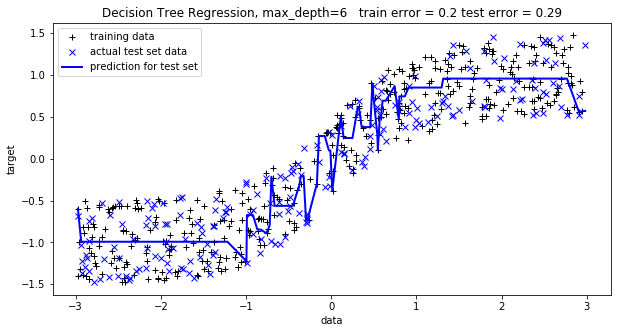

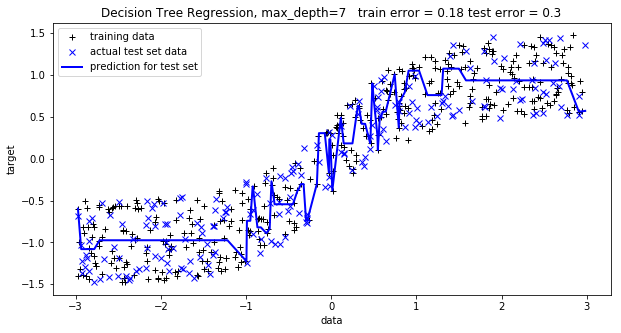

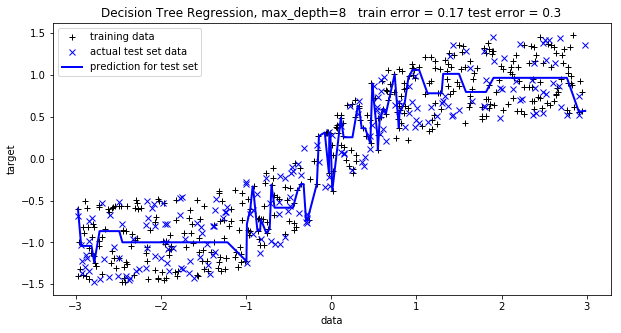

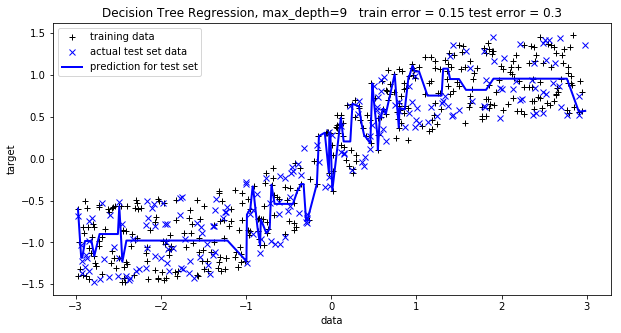

In [14]:
list_train_error = []
list_test_error = []

XtestReshaped = Xtest.reshape(Xtest.size,1)
## we are going to compute the error for various values of the hyper-parameter "max_depth", 
## and record them into a list, for later plotting
list_max_depth = np.arange(1,10)
for max_depth in list_max_depth:
    
    # Fit regression model
    clf = tree.DecisionTreeRegressor(max_depth=max_depth) ## later calls will overwrite this (which is good, here)
    clf.fit(Xreshaped, y)
    
    error_train = error_regression_MAE(clf.predict(Xreshaped),y)
    list_train_error.append(error_train) 

    error_test = error_regression_MAE(clf.predict(XtestReshaped) ,ytest)
    list_test_error.append(error_test)

    # Plot the results
    plt.figure(max_depth, [10,5])
    plt.plot(Xreshaped, y, marker='+', c="k", ls='', label="training data")
    plt.plot(XtestReshaped, ytest, marker='x', c="blue", linestyle='', label="actual test set data")
    plt.plot(XtestReshaped, clf.predict(XtestReshaped), marker='', c="blue", label="prediction for test set", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression, max_depth="+str(max_depth)+"   train error = " + str(np.round(error_train,2)) +\
            " test error = " + str(np.round(error_test,2)))
    plt.legend()
    plt.show()

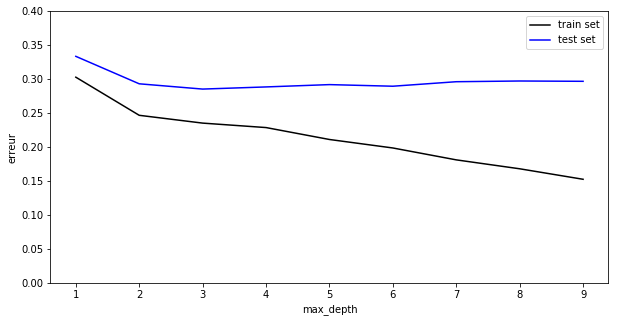

In [15]:
plt.figure(12, [10,5])
plt.plot(list_max_depth, list_train_error, label = 'train set', color='k')
plt.plot(list_max_depth, list_test_error, label = 'test set', color='blue')
plt.xlabel('max_depth')
plt.ylabel('erreur')
plt.ylim([0,0.4])
plt.legend()

In [16]:
BEST_POSSIBLE_max_depth_value = list_max_depth[np.argmin(list_test_error)]
print(list_test_error)
print("BEST_POSSIBLE_max_depth_value = " , BEST_POSSIBLE_max_depth_value)
print("test error for this value of max_depth = " , list_test_error[np.argmin(list_test_error)])

[0.3334208572544631, 0.2929956256766611, 0.28523458684624153, 0.2883974919857991, 0.29181101647409774, 0.2894369262632777, 0.2960679767739996, 0.2971183049231431, 0.2966654629401846]
BEST_POSSIBLE_max_depth_value =  3
test error for this value of max_depth =  0.28523458684624153


**We can now compute the true error, i.e. on the validation set**

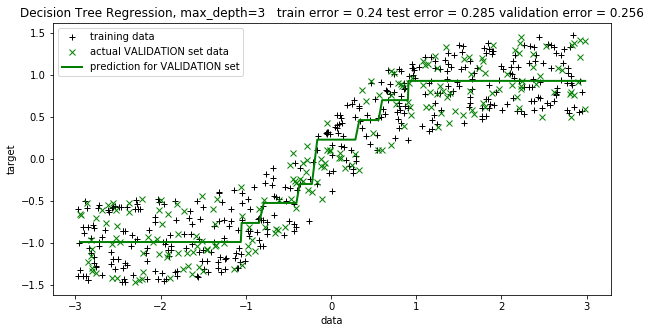

In [17]:
max_depth = BEST_POSSIBLE_max_depth_value

# Fit regression model
clf = tree.DecisionTreeRegressor(max_depth=max_depth)
clf.fit(Xreshaped, y)

error_train = error_regression_MAE(clf.predict(Xreshaped),y)
error_test = error_regression_MAE(clf.predict(XtestReshaped) ,ytest)

# Predict ON THE VALIDATON SET !! #
y_pred_vali = clf.predict(Xvali.reshape(Xvali.size,1))
error_vali = error_regression_MAE(y_pred_vali ,yvali)

# Plot the results
plt.figure(max_depth, [10,5])
plt.plot(X, y, marker='+', c="k", ls='', label="training data")
plt.plot(Xvali, yvali, marker='x', c="green", linestyle='', label="actual VALIDATION set data")
plt.plot(Xvali, clf.predict(Xvali.reshape(Xvali.size,1)), marker='', c="green", label="prediction for VALIDATION set", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression, max_depth="+str(max_depth)+"   train error = " + str(np.round(error_train,2)) +\
        " test error = " + str(np.round(error_test,3))+\
        " validation error = " + str(np.round(error_vali,3)))
plt.legend()
plt.show()

## the true error is thus of approximately 0.3 (for default values of everything, and the best possible max_depth value)

### Exercise: re-run everything, changing:
- shift to the other kind of noise
- play with sample numbers
- play with noise amplitude

In [18]:
# you can do this by just changing values in the first cells and re-run everything (Kernel-> Restart&Run all)

## BONUS: another kind of regression

###(note how much this model tends to overfits less)

In [19]:
## isotonic regression (for monotonically increasing functions)
from sklearn.isotonic import IsotonicRegression
iso_reg = IsotonicRegression().fit(X, y)
y_predict_test = iso_reg.predict(Xtest)  #3 the boundaries are not predicted
print(y_predict_test[0:5])
print(y_predict_test[-5:])
print(error_regression_MAE(y_predict_test[1:-1], ytest[1:-1]))## so we take off the boundaries

[        nan -1.08661704 -1.08661704 -1.08661704 -1.04910102]
[0.97023597 0.97023597 0.97023597 0.97023597        nan]
0.27650705044756063


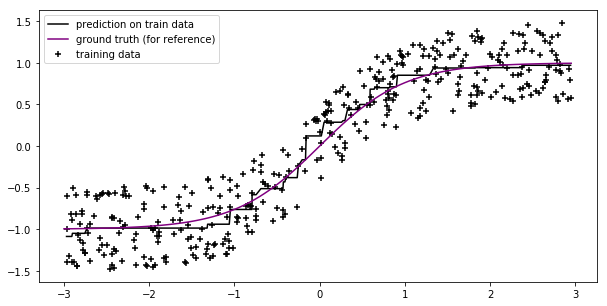

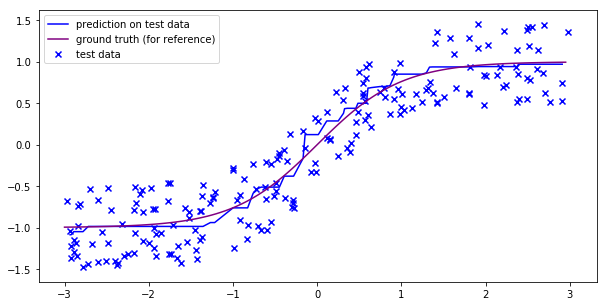

In [20]:
plt.figure(1,[10,5])
plt.scatter(X, y, marker='+', c="black" , label='training data')
plt.plot(X, iso_reg.predict(X), c="black", label='prediction on train data')
plt.plot(X_test_GroundTruth, y_test_GroundTruth, ls='-', c="purple", label="ground truth (for reference)")
plt.legend()
plt.figure(2,[10,5])
plt.plot(Xtest, iso_reg.predict(Xtest), c="blue", label='prediction on test data')
plt.scatter(Xtest, ytest, marker='x', c="blue", label="test data")
plt.plot(X_test_GroundTruth, y_test_GroundTruth, ls='-', c="purple", label="ground truth (for reference)")
plt.legend()